In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/프로젝트/뿌셔뿌셔_쑥떡

/content/drive/MyDrive/프로젝트/뿌셔뿌셔_쑥떡


In [ ]:
# # 한글 깨짐 방지
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime

plt.rc('font', family='NanumBarunGothic') 

# User_spec EDA

In [ ]:
# 데이터 불러오기
user_spec = pd.read_csv('datasets/user_spec.csv',encoding='CP949')
user_spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 17 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394216 non-null  int64  
 1   user_id                              1394216 non-null  int64  
 2   birth_year                           1381255 non-null  float64
 3   gender                               1381255 non-null  float64
 4   insert_time                          1394216 non-null  object 
 5   credit_score                         1289101 non-null  float64
 6   yearly_income                        1394126 non-null  float64
 7   income_type                          1394131 non-null  object 
 8   company_enter_month                  1222456 non-null  float64
 9   employment_type                      1394131 non-null  object 
 10  houseown_type                        1394131 non-null  object 
 11

In [ ]:
user_spec = user_spec.dropna(subset=['gender','birth_year'])

#age변수 추가
user_spec['age'] = (2022 - user_spec['birth_year'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# credit_rate 변수 추가
standard = [0, 334, 453, 529, 629, 697, 767, 834, 890, 941, 1000]
label = [str(x) for x in range(len(standard)-1,0,-1)]

user_spec['credit_rate'] = pd.cut(user_spec['credit_score'], standard, right=True, labels=label)

In [ ]:
# 필요없는 변수 제거
user_spec = user_spec.drop(['birth_year','personal_rehabilitation_complete_yn','personal_rehabilitation_yn','credit_score'], axis=1)

In [ ]:
# 생성일시 데이터 형태 변환(문자형->날짜형)
user_spec['insert_time'] = pd.to_datetime(user_spec['insert_time'])
insert_year = user_spec['insert_time'].dt.year

insert_month = user_spec['insert_time'].apply(lambda x : str(x).split('-')[0]+str(x).split('-')[1])

# continue_year(파생변수 : 근속년수 생성)
user_spec['enter_year'] = user_spec['company_enter_month'].fillna(insert_year).apply(lambda x : int(str(x)[0:4]))
user_spec['continue_year'] = insert_year - user_spec['enter_year']

# continue_month(파생변수 : 근속달수 생성)
user_spec['enter_month'] = user_spec['company_enter_month'].fillna(insert_month).apply(lambda x : int(str(x)[4:6]))
user_spec['continue_month'] = user_spec['continue_year']*12 + insert_month.apply(lambda x : int(str(x)[-2:])) - user_spec['enter_month']

user_spec.drop(['insert_time','enter_year','company_enter_month','continue_year'],axis=1, inplace=True)
user_spec.isnull().sum()

application_id            0
user_id                   0
gender                    0
yearly_income            88
income_type              83
employment_type          83
houseown_type            83
desired_amount           83
purpose                  83
existing_loan_cnt    193311
existing_loan_amt    307637
age                       0
credit_rate          103397
enter_month               0
continue_month            0
dtype: int64

In [ ]:
# 문자열 변환 함수 
def change_lang(target,kor, eng):
  for i in range(len(kor)):
   target = str(target).replace(kor[i], eng[i])
  return target

In [ ]:
# purpose
kor = ['생활비', '대환대출', '사업자금', '기타', '전월세보증금', '주택구입','투자','자동차구입']
eng = ['LIVING','SWITCHLOAN','BUSINESS','ETC','HOUSEDEPOSIT','BUYHOUSE','INVEST','BUYCAR'] 

user_spec['purpose'] = user_spec['purpose'].apply(change_lang, args=(kor, eng))

In [ ]:
# 결측값 제거
user_spec.dropna(subset=['houseown_type'],inplace=True)

In [ ]:
# houseown_type, employment_type, purpose 범주 변환 함수
def change(x, list):
    return list.index(x)

In [ ]:
list = ['전월세', '기타가족소유','자가','배우자']
user_spec['houseown_type'] = user_spec['houseown_type'].apply(change, args=[list])

In [ ]:
list = ['정규직','계약직','일용직','기타']
user_spec['employment_type'] = user_spec['employment_type'].apply(change, args=[list])

In [ ]:
list = ['LIVING','SWITCHLOAN','BUSINESS','ETC','HOUSEDEPOSIT','BUYHOUSE','INVEST','BUYCAR'] 
user_spec['purpose'] = user_spec['purpose'].apply(change, args=[list])

In [ ]:
user_spec.dropna(inplace=True)

In [ ]:
user_spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048182 entries, 0 to 1394214
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   application_id     1048182 non-null  int64   
 1   user_id            1048182 non-null  int64   
 2   gender             1048182 non-null  float64 
 3   yearly_income      1048182 non-null  float64 
 4   income_type        1048182 non-null  object  
 5   employment_type    1048182 non-null  int64   
 6   houseown_type      1048182 non-null  int64   
 7   desired_amount     1048182 non-null  float64 
 8   purpose            1048182 non-null  int64   
 9   existing_loan_cnt  1048182 non-null  float64 
 10  existing_loan_amt  1048182 non-null  float64 
 11  age                1048182 non-null  float64 
 12  credit_rate        1048182 non-null  category
 13  enter_month        1048182 non-null  int64   
 14  continue_month     1048182 non-null  int64   
dtypes: category(1),

In [ ]:
# 성별 빈도 시각화를 위한 확인
user_spec['gender'].value_counts()

1.0    713090
0.0    335092
Name: gender, dtype: int64

In [ ]:
user_spec[['gender','user_id']].groupby('gender').count()

,user_id
gender,
0.0,335092
1.0,713090


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


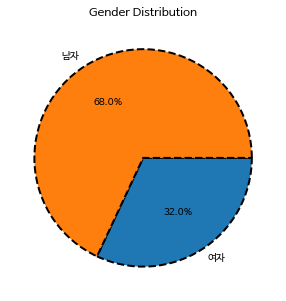

In [ ]:
# 성별 빈도 시각화
gender = user_spec[['gender','user_id']].groupby('gender').count()
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
plt.pie(gender, labels=['여자','남자'], autopct="%.1f%%",counterclock=False,wedgeprops={'edgecolor':'k','linestyle':'--','linewidth':2})
plt.title('Gender Distribution')
plt.show()

In [ ]:
# 연령 시각화를 위한 확인
user_spec['age'].value_counts()

40.0    42589
41.0    40247
30.0    39364
42.0    37955
39.0    37646
        ...  
85.0       16
90.0        7
89.0        2
91.0        1
92.0        1
Name: age, Length: 74, dtype: int64

In [ ]:
# 연령 범주화
# 1. 19~29
# 2. 30~39
# 3. 40~49
# 4. 50~59
# 5. 60 ~ 


def get_category(age):
    age_cat = ''
    if age <= 29: age_cat = '20대'
    elif age <= 39: age_cat = '30대'
    elif age <= 49: age_cat = '40대'
    elif age <= 59: age_cat = '50대'
    else : age_cat = '60대이상'
    
    return age_cat

# plt.rc("font", family = "NanumBarunGothic")

plt.figure(figsize=(10,6))
 
group_names = ['20대', '30대', '40대', '50대', '60대이상']

user_spec['age_cat'] = user_spec['age'].apply(lambda x : get_category(x))

# user_spec.drop('age_cat', axis=1, inplace=True)

<Figure size 720x432 with 0 Axes>

In [ ]:
user_spec.to_csv('pp_user_spec.csv',index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


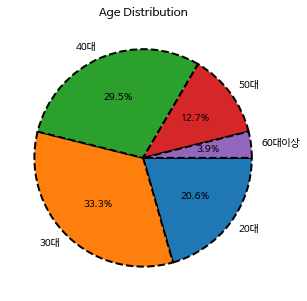

In [ ]:
# 연령 시각화
g_age = user_spec[['age_cat','user_id']].groupby('age_cat').count()
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
plt.pie(g_age, labels = g_age.index, autopct="%.1f%%",counterclock=False,wedgeprops={'edgecolor':'k','linestyle':'--','linewidth':2})
plt.title('Age Distribution')
plt.show()

In [ ]:
# income_type 시각화를 위한 빈도 확인
user_spec['income_type'].value_counts()

EARNEDINCOME       692878
OTHERINCOME        119768
PRIVATEBUSINESS     90931
FREELANCER          73545
EARNEDINCOME2       56917
PRACTITIONER        14143
Name: income_type, dtype: int64

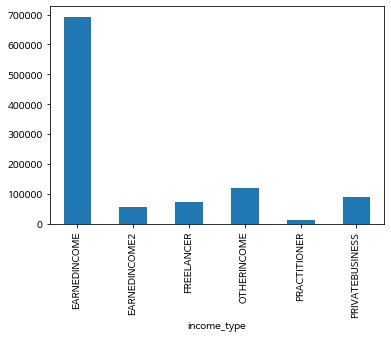

In [ ]:
# income_type 시각화
income = user_spec.groupby(["income_type"])["user_id"].count()
income.plot(kind='bar')

[Text(0, 0, '정규직'), Text(0, 0, '계약직'), Text(0, 0, '일용직'), Text(0, 0, '기타')]

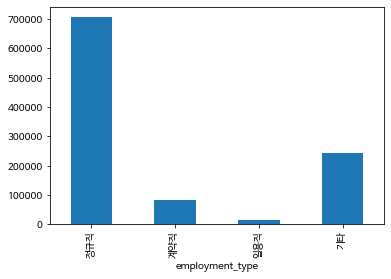

In [ ]:
# employment_type 시각화
employment_type = user_spec.groupby(["employment_type"])["user_id"].count()
employment_type=employment_type.plot(kind='bar')
employment_type.set_xticklabels(['정규직','계약직','일용직','기타'])

[Text(0, 0, '전월세'), Text(0, 0, '기타가족소유'), Text(0, 0, '자가'), Text(0, 0, '배우자')]

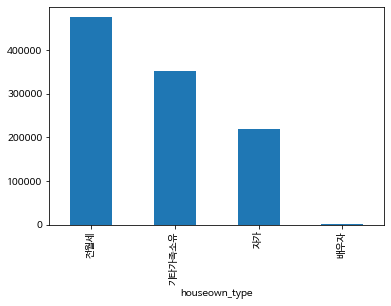

In [ ]:
# houseown_type 시각화
houseown_type = user_spec.groupby(["houseown_type"])["user_id"].count()
houseown_type=houseown_type.plot(kind='bar')
houseown_type.set_xticklabels(['전월세', '기타가족소유','자가','배우자'])

[Text(0, 0, 'LIVING'),
 Text(0, 0, 'SWITCHLOAN'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'ETC'),
 Text(0, 0, 'HOUSEDEPOSIT'),
 Text(0, 0, 'BUYHOUSE'),
 Text(0, 0, 'INVEST'),
 Text(0, 0, 'BUYCAR')]

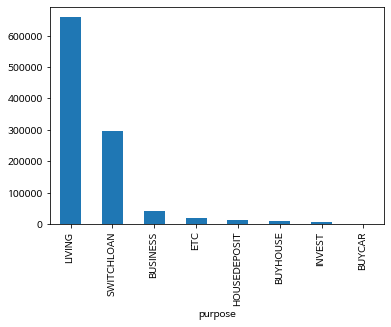

In [ ]:
# purpose 시각화
purpose = user_spec.groupby(["purpose"])["user_id"].count()
purpose = purpose.plot(kind='bar')
purpose.set_xticklabels(['LIVING','SWITCHLOAN','BUSINESS','ETC','HOUSEDEPOSIT','BUYHOUSE','INVEST','BUYCAR'])

# Loan_result EDA

In [ ]:
# 데이터 불러오기
loan_result = pd.read_csv('datasets/loan_result.csv')
loan_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527363 entries, 0 to 13527362
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  object 
 2   bank_id                int64  
 3   product_id             int64  
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
dtypes: float64(3), int64(3), object(1)
memory usage: 722.4+ MB


In [ ]:
# 필요없는 데이터 제거후 결측치 확인
loan_result.dropna(subset=['loan_limit','loan_rate'], inplace=True)
loan_result.isnull().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                     0
loan_rate                      0
is_applied               3255482
dtype: int64

In [ ]:
# Is_applied 빈도 확인
app = loan_result['is_applied'].value_counts(dropna=False)
app

0.0    9709675
NaN    3255482
1.0     554711
Name: is_applied, dtype: int64

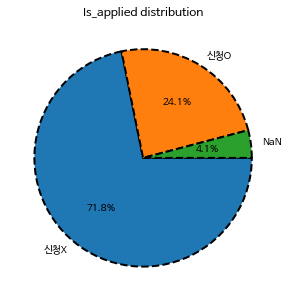

In [ ]:
# Is_applied 빈도 시각화
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
plt.pie(app, labels=['신청X','신청O','NaN'], autopct="%.1f%%",counterclock=False,wedgeprops={'edgecolor':'k','linestyle':'--','linewidth':2})
plt.title('Is_applied distribution')
plt.show()

# Log EDA

In [ ]:
# 데이터 불러오기
log_data = pd.read_csv('datasets/log_data.csv')
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17843993 entries, 0 to 17843992
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   event           object
 2   timestamp       object
 3   mp_os           object
 4   mp_app_version  object
 5   date_cd         object
dtypes: int64(1), object(5)
memory usage: 816.8+ MB


In [ ]:
log_data.drop(['mp_os','mp_app_version','date_cd'],inplace=True,axis=1)

In [ ]:
# evnet 변수 숫자형으로 변환하여 분석 속도 높이기

cate = ['SignUp','OpenApp','Login','ViewLoanApplyIntro','StartLoanApply','CompleteIDCertification','EndLoanApply','UseLoanManage','UsePrepayCalc','UseDSRCalc','GetCreditInfo']

log_data['event'] = log_data['event'].apply(lambda x : str(cate.index(x)))
log_data['event'].value_counts()

1     3460762
6     2715253
10    2661997
2     2463755
4     1893914
3     1804712
7     1558906
5     1237777
0       34892
8        7360
9        4665
Name: event, dtype: int64

In [ ]:
log_data['timestamp'] = pd.to_datetime(log_data['timestamp'])
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17843993 entries, 0 to 17843992
Data columns (total 3 columns):
 #   Column     Dtype         
---  ------     -----         
 0   user_id    int64         
 1   event      object        
 2   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 408.4+ MB


In [ ]:
log_data.to_csv('pp_log_data.csv',index=False)

In [ ]:
# 선행페이지와 후행페이지 count(event 중복 제거)

b_f_count = {}
for i in range(1,len(log_data)):
    if (log_data.iloc[i]['user_id']!=log_data.iloc[i-1]['user_id']) or (log_data.iloc[i]['timestamp'].date() != log_data.iloc[i-1]['timestamp'].date()) or (log_data.iloc[i]['event'] == log_data.iloc[i-1]['event']):
        continue
    else :
        if (log_data.iloc[i-1]['event'], log_data.iloc[i]['event']) in b_f_count.keys() :
            b_f_count[(log_data.iloc[i-1]['event'], log_data.iloc[i]['event'])] += 1
        else :
            b_f_count[(log_data.iloc[i-1]['event'], log_data.iloc[i]['event'])] = 1
print(b_f_count)

In [ ]:
# 선행페이지와 후행페이지에서 event 중복 제거 전

# a = {('10', '10'): 514700, ('7', '2'): 48282, ('2', '10'): 676712, ('1', '10'): 203868, ('10', '7'): 583488, ('7', '10'): 727399, ('10', '8'): 1569, ('8', '4'): 694, ('4', '3'): 1198890, ('3', '5'): 1143369, ('5', '6'): 1073933, ('6', '7'): 154207, ('7', '7'): 124647, ('7', '3'): 70500, ('6', '10'): 121516, ('10', '6'): 43808, ('6', '6'): 738912, ('7', '4'): 123963, ('4', '6'): 685076, ('6', '1'): 473535, ('1', '3'): 12489, ('3', '10'): 133937, ('1', '4'): 232834, ('1', '2'): 2139317, ('2', '4'): 856762, ('3', '1'): 100303, ('10', '4'): 307198, ('6', '5'): 4228, ('6', '4'): 168485, ('1', '1'): 211687, ('6', '3'): 246275, ('3', '6'): 55599, ('7', '1'): 125964, ('2', '7'): 493738, ('10', '2'): 122675, ('2', '3'): 111771, ('10', '1'): 214366, ('1', '7'): 115537, ('10', '3'): 113652, ('3', '3'): 33502, ('10', '5'): 66524, ('3', '4'): 94135, ('3', '7'): 56864, ('3', '0'): 4486, ('0', '4'): 12619, ('7', '6'): 65952, ('10', '0'): 866, ('0', '7'): 3241, ('5', '1'): 28637, ('2', '1'): 111079, ('1', '0'): 12541, ('0', '1'): 1222, ('4', '7'): 632, ('1', '5'): 3258, ('5', '0'): 14457, ('1', '6'): 4168, ('7', '5'): 2279, ('5', '4'): 28004, ('5', '5'): 3808, ('5', '10'): 9045, ('7', '8'): 2896, ('8', '10'): 1388, ('2', '6'): 28871, ('2', '5'): 7565, ('0', '10'): 3875, ('5', '3'): 8932, ('3', '8'): 420, ('7', '9'): 2292, ('9', '10'): 833, ('4', '4'): 2437, ('2', '0'): 1378, ('5', '7'): 4355, ('8', '1'): 441, ('4', '1'): 2335, ('9', '8'): 847, ('0', '5'): 694, ('9', '3'): 339, ('4', '5'): 1537, ('3', '9'): 327, ('8', '7'): 345, ('10', '9'): 1334, ('6', '2'): 1071, ('0', '3'): 906, ('6', '0'): 305, ('8', '8'): 1567, ('4', '10'): 1181, ('2', '2'): 545, ('9', '6'): 139, ('3', '2'): 291, ('8', '6'): 266, ('7', '0'): 369, ('0', '6'): 84, ('8', '9'): 433, ('9', '1'): 323, ('8', '3'): 527, ('0', '0'): 101, ('5', '2'): 164, ('9', '9'): 232, ('9', '4'): 466, ('9', '5'): 4, ('9', '7'): 147, ('8', '5'): 3, ('0', '2'): 14, ('6', '8'): 15, ('6', '9'): 8, ('2', '9'): 6, ('1', '9'): 11, ('4', '0'): 6, ('4', '2'): 2, ('4', '8'): 1, ('2', '8'): 6, ('1', '8'): 2}
# len(a.values())

In [ ]:
# a1 = sorted(a.items())
# a1

In [ ]:
# 표 만들기
import pandas as pd

df = pd.DataFrame(columns = ['before','after','count'])
for i, j in enumerate(b_f_count) :
  if j[0][0] != j[0][1] :
    df.loc[i] = [int(j[0][0]), int(j[0][1]), int(j[1])]

df = df.sort_values(by =['before','count'], ascending=[True, False])
df.reset_index(inplace=True, drop=True)

df = df.astype('int64')
df.info()

In [ ]:
df_max = df.groupby(['before']).head(1)
df_max

In [ ]:
# 선행페이지와 후행페이지 event 최대 빈도 시각화1
fig = plt.figure(figsize=(8, 7))
sns.scatterplot(x='before',y='after',data=df_max, hue='count', size='count',sizes=(60, 900), legend=False, palette="dark", alpha=0.4)

for i in range(len(df_max)):
  plt.annotate((df_max.iloc[i]['before'],df_max.iloc[i]['after']), (df_max.iloc[i]['before'],df_max.iloc[i]['after']+0.3), 
               horizontalalignment='center')
  
sns.set(font_scale=1)
plt.show()

In [ ]:
# 선행페이지와 후행페이지 event 최대 빈도 시각화2

fig = go.Figure(data=go.Scatter(
    x=df_max['before'],
    y=df_max['after'],
    mode='markers',
    textposition='top center',
    marker=dict(size=np.log2(df_max['count']),color=df_max['count']),
    text = df_max['count'],
    hovertemplate = "(%{x}, %{y}) <br>%{text:,}<extra></extra>"
))

fig.update_layout(
    autosize=False,
    width=600,
    height=450,
)
fig.show()